Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

Описание датасета:
1. Id - идентификационный номер квартиры
2. DistrictId - идентификационный номер района
3. Rooms - количество комнат
4. Square - площадь
5. LifeSquare - жилая площадь
6. KitchenSquare - площадь кухни
7. Floor - этаж
8. HouseFloor - количество этажей в доме
9. HouseYear - год постройки дома
10. Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
11. Social_1, Social_2, Social_3 - социальные показатели местности
12. Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
13. Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
14. Price - цена квартиры

Загружаем тренировочный и тестовый наборы.

In [736]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [737]:
df = pd.read_csv('train.csv')
dft = pd.read_csv('test.csv')

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [739]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [740]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Не-числовые признаки у нас Ecology_2, Ecology_3, Shops_2:

In [741]:
df.select_dtypes(include=['object']).head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


Пропуски. (они у нас в числовых значениях Healthcare_1 и жилой площади) Healthcare_1 некая абстрактная переменная - представить ее смысл исходя из описания невозможно, поэтому думаю пропуски в ней можно пока попробовать заполнить просто средним значением... (какого-то наиболее частого значения в этом признаке не прослеживается)

In [742]:
df['Healthcare_1'].mode()

0    540.0
dtype: float64

0 повторяется чаще всего - но в общем объеме данных составляет < 0.1, соответственно пока берем median по району. (это явно будет лучше, особенно если там еще есть выбросы..

In [743]:
fix = df.groupby(['DistrictId'], as_index=False).agg({'Healthcare_1': 'median'}).\
rename(columns={'Healthcare_1': 'fixedcare_1'})
fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 2 columns):
DistrictId     205 non-null int64
fixedcare_1    170 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Мерджим с основным df

In [744]:
df = df.merge(fix, on=['DistrictId'], how='left')

In [745]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,fixedcare_1
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,NaN
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,320.0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,229.0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,1084.0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,2078.0


Теперь заменим nan на средние и удалим вспомогательную колонку

In [746]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['fixedcare_1']
df.drop(['fixedcare_1'], axis=1, inplace=True)

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     8116 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.9+ MB


Пропусков было так много, что есть целые районы без единого значения. Таким будем ставить общий median..

In [748]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

Далее - площади. Тут некоторый бардак. Есть квартиры с нулевыми площадями, есть пропуски в жилых площадях, есть нулевые кухни..

In [749]:
df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [750]:
df[df['Square'] < 10].shape

(12, 20)

Домов с площадью меньше 10м2 всего-то 12 штук.. И там полный бред в соотношении площадей Жилой и общей. Попробуем выявить все у кого жилая площадь больше общей..

In [751]:
df[df['Square'] < df['LifeSquare']].shape

(482, 20)

Таких довольно много уже. Посмотрим сколько супер-больших

In [752]:
df[df['Square'] > df['Square'].quantile(.999)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2620.0,2,6,B,338644.075979
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,750.0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
5087,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,1340.0,2,5,B,340273.238253
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
7201,3233,129,4.0,186.692602,87.487080,32.0,3,3.0,2011,0.020741,B,B,24,5613,5,1340.0,2,5,B,423443.464367
8511,4249,23,5.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0.0,0,0,B,345665.209100
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,750.0,1,4,B,528560.506016


600м2 и цена невысокая - явно ошибка. И 400 метров - тоже. 

In [753]:
df.drop(df[df['Square']>400].index, inplace=True)

Теперь микроскопические. Попробуем выяснить основное соотношение общей площади к жилой..

In [754]:
square_ratio = df['Square'].median()/df['LifeSquare'].median()
square_ratio

1.6021326087961296

Ок.. Попробуем восстановить с помощью этого супер-маленькие общие площади..

In [755]:
df.loc[(df['Square'] < 10) & (df['LifeSquare'] > 10), 'Square'] = df['LifeSquare'] * square_ratio

Остальные отсутствующие или супер-маленькие общие площади...

In [756]:
df.loc[(df['Square'] < 6)].shape

(9, 20)

Всего 9 записей. Удаляем

In [757]:
df.drop(df[df['Square']<6].index, inplace=True)

Ну и теперь попробуем выправить отсутствующие жилые площади обратно.

In [758]:
df.loc[(df['LifeSquare'] < 5), 'LifeSquare'] = df['Square'] / square_ratio

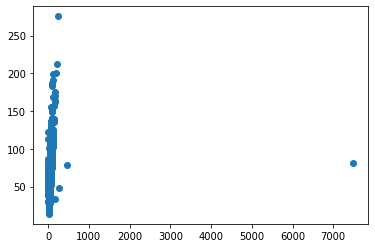

In [759]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

In [760]:
df['LifeSquare'].max()

7480.592128925201

Еще выброс по жилой площади. 

In [761]:
df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] / square_ratio

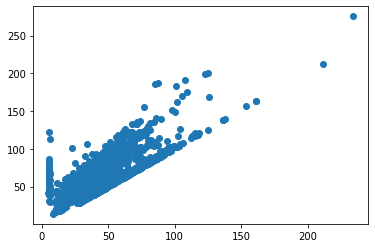

In [762]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

Все-таки часть значений для жилой площади все еще не соответствует общим площадям квартир.

In [763]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.00000,9988.000000,7876.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.89127,56.243459,35.341413,6.277934,8.524229,12.615138,3.992569e+03,0.118863,24.696536,5353.968062,8.032439,984.539447,1.319483,4.230376,214108.240296
std,4859.141539,43.598423,0.83935,19.095167,15.472153,28.577514,5.234227,6.770839,2.006207e+05,0.119054,17.534235,4006.975770,23.808096,922.471515,1.493604,4.804133,92789.208200
min,0.000000,0.000000,0.00000,13.784865,5.005477,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.500000,20.000000,1.00000,41.787090,23.189854,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,240.000000,0.000000,1.000000,153907.528147
50%,8394.500000,36.000000,2.00000,52.539909,32.416157,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,750.000000,1.000000,3.000000,192304.063740
75%,12594.250000,75.000000,2.00000,65.912854,44.066923,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1322.000000,2.000000,6.000000,249116.513046
max,16798.000000,209.000000,19.00000,275.645284,233.949309,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Попробуем всетаки как то их исправить.. Возможно критерий будет такой - если жилая площадь очень маленькая (меньше первого квартиле) и разрыв между ней и общей площадью достаточно велик - то исправляем ее согласно общей площади.

In [764]:
df.loc[(df['Square'] / df['LifeSquare'] > square_ratio * 2) & (df['LifeSquare'] < 20)\
       , 'LifeSquare'] = df['Square'] / square_ratio

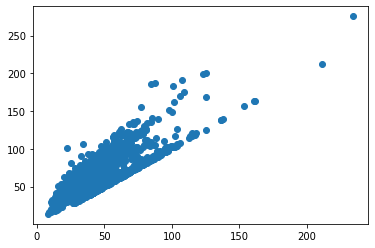

In [765]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

Не знаю - поможет ли нам это - но выглядит более-менее разумно...
Ну и ради чего всё затевалось - вылечить пропуски в LifeSquare

In [766]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] / square_ratio

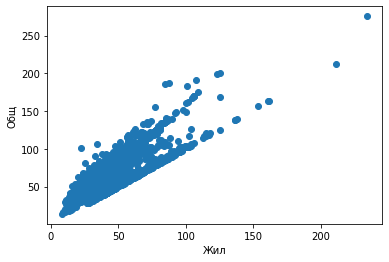

In [767]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.xlabel('Жил')
plt.ylabel('Общ')
plt.draw()

В площади кухни тоже явно есть выбросы посмотрим..

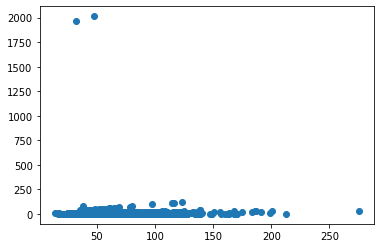

In [768]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.draw()

Есть нулевые кухни и супер-огромные надо вылечить.

In [769]:
df.loc[df['KitchenSquare'] > df['KitchenSquare'].quantile(.998)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,2300.0,0,0,A,108337.484207
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,750.0,0,0,B,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,438708.707579
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,4129.0,0,3,B,261125.669724
2916,12390,72,3.0,97.490674,60.850565,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,2300.0,0,0,A,315245.521059
4079,6508,23,2.0,67.146049,33.959154,63.0,5,17.0,2019,0.034656,B,B,0,168,0,0.0,0,0,B,193130.585871
4110,299,27,2.0,66.787523,64.616662,60.0,14,20.0,2015,0.017647,B,B,2,469,0,750.0,0,0,B,179466.094235
4651,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,1084.0,0,5,B,296165.936689


Даже 60м2 кухня в квартире - это перебор наверное....

In [770]:
df.loc[df['KitchenSquare'] > df['Square'], 'KitchenSquare'] =\
df['Square'] / (df['Square'].median()/df['KitchenSquare'].median())

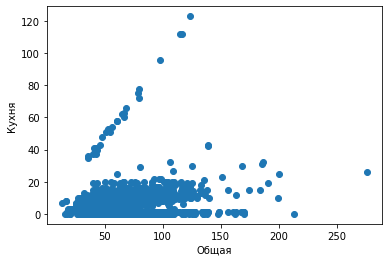

In [771]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Вот с этой диагональю что нибудь сделаем - это не выглядит нормальным - может конечно жил площадь в кухни записали - но этого мы не знаем точно

In [772]:
kitchen_ratio = df['Square'].median()/df['KitchenSquare'].median()
kitchen_ratio

8.756651563192996

In [773]:
df.loc[abs((df['KitchenSquare']/df['Square']) > 0.7), 'KitchenSquare'] = df['Square'] / kitchen_ratio

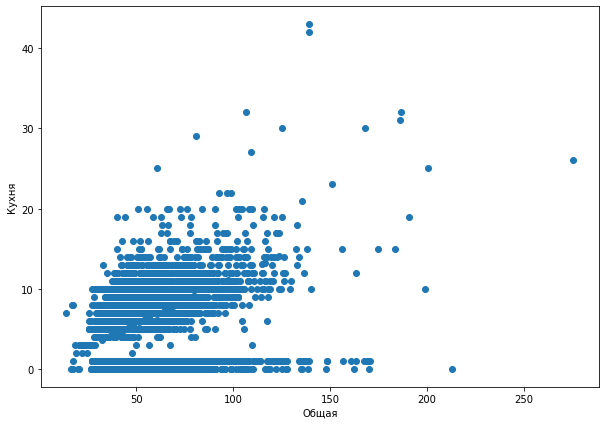

In [774]:
plt.figure(figsize=(10,7))
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Нулевые тоже приведем по соотношению

In [775]:
df.loc[df['KitchenSquare'] == 0, 'KitchenSquare'] = round(df['Square']/kitchen_ratio)

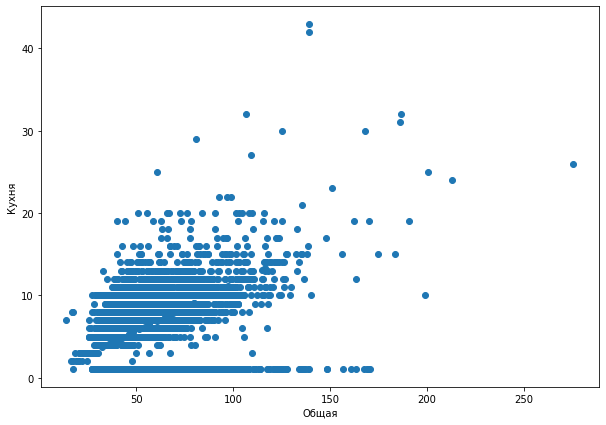

In [776]:
plt.figure(figsize=(10,7))
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Выбросы в количестве комнат... 

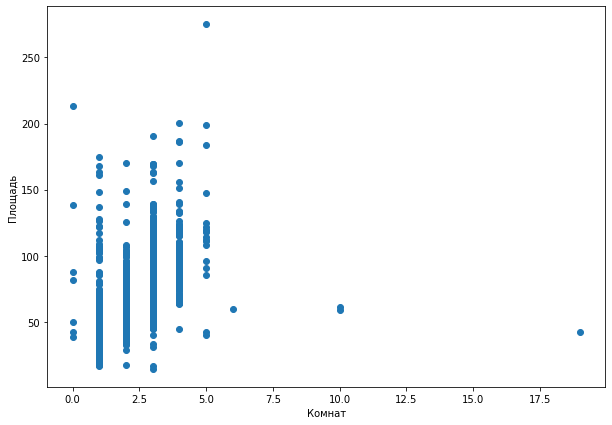

In [777]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

In [778]:
df.loc[df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,16.0,4,3.0,2016,0.075424,B,B,11,3097,0,750.0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,24.0,2,3.0,2008,0.211401,B,B,9,1892,0,750.0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,26.084533,5.0,13,0.0,1977,0.211401,B,B,9,1892,0,750.0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,30.886021,6.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,50.864358,9.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,750.0,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,10.0,5,15.0,1977,0.211401,B,B,9,1892,0,750.0,0,1,B,219281.918007


0 комнат - это конечно бред для квартиры.. Думаю количество комнат в некотором роде все-таки зависит от площади..

In [779]:
rooms_ratio = df['Square'].median()/df['Rooms'].median()
rooms_ratio

26.269954689578988

In [780]:
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Square'] / rooms_ratio

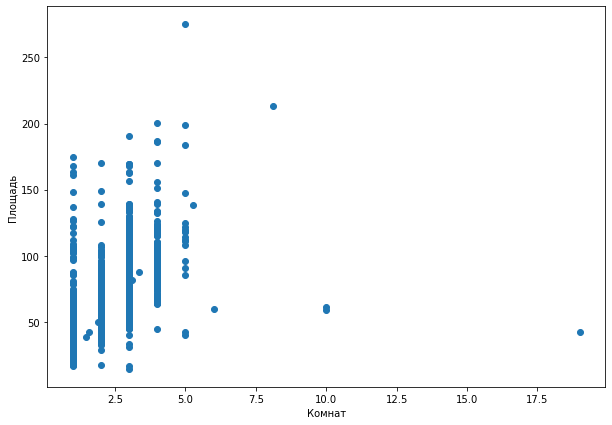

In [781]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

19 комнат в квартире площадью 50м2 тоже думаю неправда - даже 10 много попробуем вылечить.

In [782]:
df.loc[df['Square']/df['Rooms'] < 7, 'Rooms'] = df['Square'] / rooms_ratio

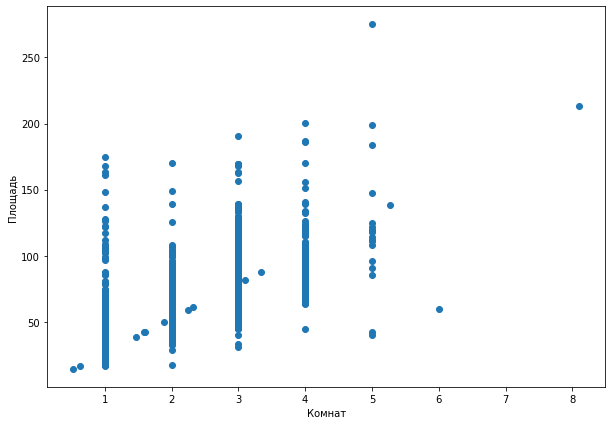

In [783]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

С этажами и этажностью тоже много путаницы. Это тоже немного влияет на цены вроде как..

In [784]:
df.loc[df['Floor'] > df['HouseFloor']].shape

(1818, 20)

In [785]:
df['HouseFloor'].median()

13.0

In [786]:
df['HouseFloor'].mean()

12.615138165798959

Выглядит довольно консистентно - немного со смещением в сторону 0. Трудно предположить зависимость этажности дома от чего-то остального, имеющегося в нашем распоряжении - поэтому видимо нулевые выставляем в медианное значение.


In [787]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

Теперь с этажом квартиры. Впринципе (насколько я знаю) - на цену влияют сильнее всего первый и последний этажи. Попробуем хотя-бя проследить нечто подобное. Как мы видим из describe нулевых этажей нет (это кстати наводит на мысли о том, что данные в этом признаке аккуратны - им как-то больше доверия сразу.

In [788]:
middle_floor_df = df.loc[(df['Floor'] != df['HouseFloor'])  & (df['Floor'] != 1)]
margin_floor_df = df.loc[(df['Floor'] == df['HouseFloor']) | (df['Floor'] == 1)]

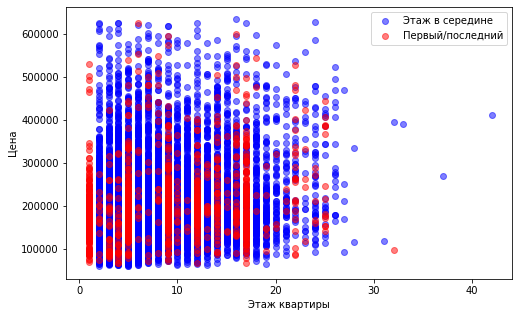

In [789]:
plt.figure(figsize=(8,5))
plt.scatter(middle_floor_df['Floor'], middle_floor_df['Price'], color='blue', alpha=0.5, label='Этаж в середине')
plt.scatter(margin_floor_df['Floor'], margin_floor_df['Price'], color='red', alpha=0.5, label='Первый/последний')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена')
plt.legend(loc='upper right')
plt.draw()

Ну - может быть мне кажется - но ощущение, что цена у первых и последних этажей в целом ниже... Соответственно - есть смысл наверное побороться за чистоту этого признака. Проблема в том, что общая этажность дома имеет неточности о чем свидетельствовали нули в этом признаке и значения этажа квартиры выше дома..

In [790]:
df.loc[df['Floor'] > df['HouseFloor']].shape

(1604, 20)

Соотношение квартир на первых-последних этажах ко всем остальным (включая конечно же и ошибочные)

In [791]:
len(middle_floor_df)/len(margin_floor_df)

7.792253521126761

Вот наверное согласно этому соотношению попробуем заполнить ошибочные этажности. Для начала сделаем новый бинарный признак ("средний этаж" - 1, "первый/последний - 0")

In [792]:
df['middleFloor'] = np.where((df['Floor'] == 1) | (df['Floor'] == df['HouseFloor']), 0, 1)

И пометим все записи с явно ошибочной этажностью nan-ами в этом признаке

In [793]:
df.loc[df['Floor'] > df['HouseFloor'], 'middleFloor'] = np.nan

Теперь посмотрим соотношение "средних" к "краевым"

In [794]:
df.middleFloor.value_counts()

1.0    7248
0.0    1136
Name: middleFloor, dtype: int64

In [795]:
floorRatio = df.middleFloor.value_counts(normalize=True)
floorRatio

1.0    0.864504
0.0    0.135496
Name: middleFloor, dtype: float64

Кстати, как сейчас выглядит распределение этаж/этажность дома

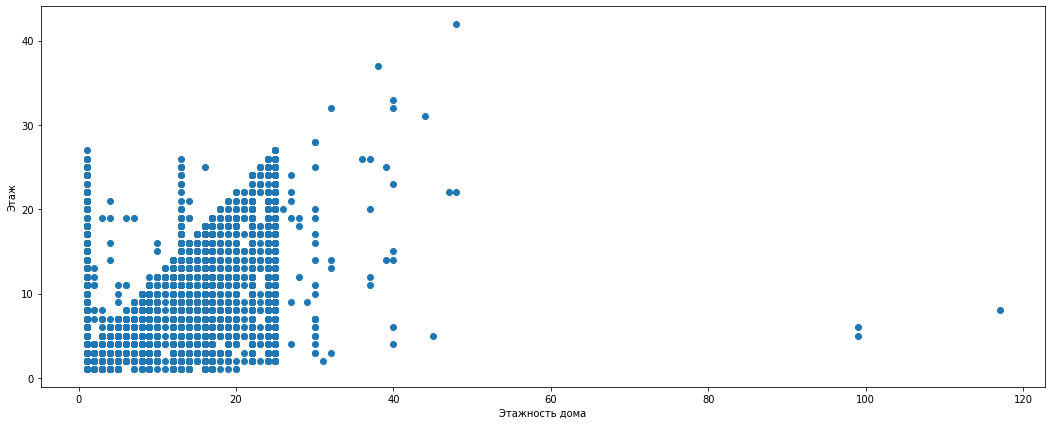

In [796]:
plt.figure(figsize=(18,7))
plt.scatter(df['HouseFloor'], df['Floor'])
plt.ylabel('Этаж')
plt.xlabel('Этажность дома')
plt.draw()

Вот всё, что "торчит" слева над четким треугольником - и есть ошибки

Попробуем лечить статистическим распределением (все ошибочные распределим в соотношении 0.864504 - средние этажи (выставим значение этажности куда-то выше этажа квартиры, скажем этажа на 3) к 0.135496 - крайние этажи - здесь значение этажности дома будем делать равным этажу квартиры. Сначала исправим бинарный признак

In [797]:
wrong = df['middleFloor'].isnull()
df.loc[wrong, 'middleFloor'] = np.random.choice(floorRatio.index, size=len(df[wrong]), p=floorRatio.values)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 21 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null object
Ecology_3        9988 non-null object
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null object
Price            9988 non-null float64
middleFloor      9988 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 2.0+ MB


middleFloor заполнился. Теперь по нему "вылечим" этажность дома там где она неверна.

In [799]:
df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 1), 'HouseFloor'] = df['Floor'] + 3
df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 0), 'HouseFloor'] = df['Floor']

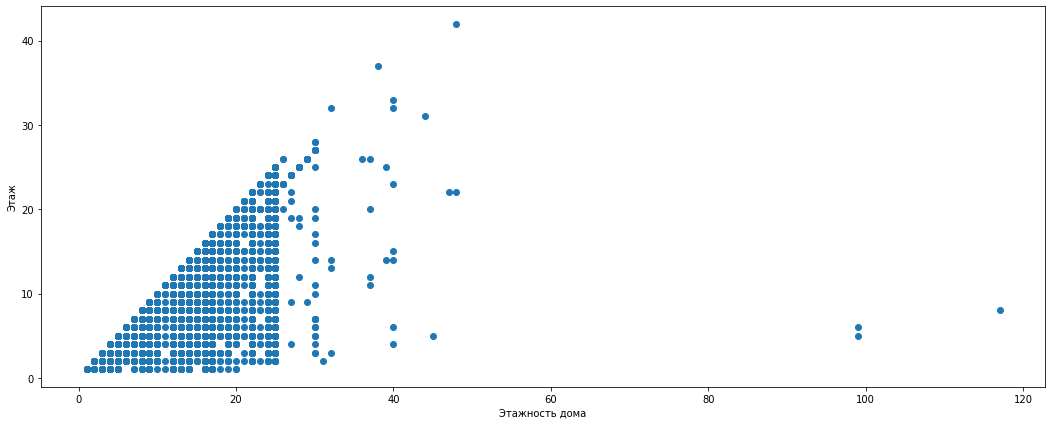

In [800]:
plt.figure(figsize=(18,7))
plt.scatter(df['HouseFloor'], df['Floor'])
plt.ylabel('Этаж')
plt.xlabel('Этажность дома')
plt.draw()

Теперь красиво. Надеюсь что это еще и будет полезно )). Бинарный признак думаю тоже оставим.

Займемся годом постройки..

In [801]:
df['HouseYear'].median()

1977.0

In [802]:
df.loc[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,...,B,30,6141,10,262.0,3,6,B,254084.534396,1.0
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,...,B,25,4756,16,2857.0,5,8,B,243028.603096,1.0


Ну понятно - тут руками надо править.

In [803]:
df.loc[df['HouseYear'] > 5000, 'HouseYear'] = 2008
df.loc[df['HouseYear'] > 4000, 'HouseYear'] = 1968

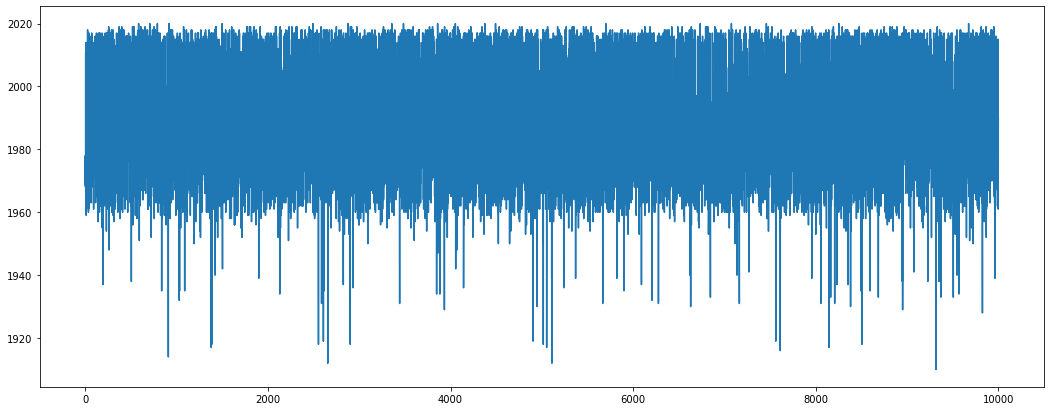

In [804]:
plt.figure(figsize=(18,7))
plt.plot(df['HouseYear'])
plt.draw()

In [805]:
df['HouseYear'].describe()

count    9988.000000
mean     1984.859732
std        18.410836
min      1910.000000
25%      1974.000000
50%      1977.000000
75%      2001.000000
max      2020.000000
Name: HouseYear, dtype: float64

Это выглядит приемлемым

Теперь с категориальными признаками - все они по-сути бинарны (A/B)

In [806]:
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1
df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0

Заменим districtid строкой

In [807]:
df.DistrictId = df.DistrictId.astype(str)

Теперь попробуем получить синтетический параметр района и комнат от цены

In [808]:
df.groupby(['DistrictId', 'Rooms']).Price.agg(['median']).head()

median
DistrictId Rooms                  
0          1.000000  142799.434052
           2.000000  176210.812334
           3.000000  300610.359425
1          1.000000  146574.015522
           1.599015   78364.616704

Что еще за 1.599 комнат..

In [809]:
df.loc[df['Rooms']%1 != 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
377,5927,57,2.248081,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,1,74,19083,2,1406.0,5,15,1,317265.323792,0.0
1397,12638,27,5.269430,138.427694,136.215499,16.0,4,7.0,2016,0.075424,...,1,11,3097,0,750.0,0,0,1,268394.744389,1.0
1454,8491,1,1.599015,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,1,1,264,0,240.0,0,1,1,78364.616704,0.0
1981,7917,27,8.105547,212.932361,211.231125,24.0,2,3.0,2008,0.211401,...,1,9,1892,0,750.0,0,1,1,302211.260887,1.0
2269,7317,27,1.590824,41.790881,26.084533,5.0,13,13.0,1977,0.211401,...,1,9,1892,0,750.0,0,1,1,98129.976788,0.0
3911,770,28,1.883654,49.483501,30.886021,6.0,16,19.0,2015,0.118537,...,1,30,6207,1,1183.0,1,0,1,217009.338463,1.0
4366,456,6,3.102078,81.491446,50.864358,9.0,4,13.0,1977,0.243205,...,1,5,1564,0,540.0,0,0,1,212864.799112,1.0
4739,12676,81,0.524739,13.784865,8.604072,7.0,4,5.0,1960,0.319809,...,1,25,4756,16,2857.0,5,8,1,78388.806186,1.0
5617,15877,57,0.629892,16.547242,10.328260,8.0,5,5.0,1962,0.133215,...,1,49,11395,3,1406.0,3,4,0,77835.185808,0.0
6149,3159,88,1.473056,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,1,43,8429,3,750.0,3,9,1,158998.110646,1.0


In [810]:
import math
shifted_round = lambda x: round(x) if x%1 > 0.6 else math.floor(x)
df.loc[df['Rooms']%1 != 0, 'Rooms'] = df['Rooms'].apply(shifted_round)

In [811]:
medPrice = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'}).rename(columns={'Price': 'medianPrice'})

In [812]:
df = df.merge(medPrice, on=['DistrictId', 'Rooms'], how='left')

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9987
Data columns (total 22 columns):
Id               9988 non-null int64
DistrictId       9988 non-null object
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null int64
Ecology_3        9988 non-null int64
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null int64
Price            9988 non-null float64
middleFloor      9988 non-null float64
medianPrice      9988 non-null float64
dtypes: float64(10), int64(11), object(1)
memory usage: 1.

Может индекс тоже сконвертировать в строки.. или вообще удалить.

In [814]:
df.index = df.index.astype(str)

In [815]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [816]:
def standardize(df):
    feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'middleFloor', 'index']
    test_df = df.copy()
    test_df.Id = test_df.Id.astype(str)
    test_df.reset_index(inplace=True)
    scaler = StandardScaler()
    features_to_stand = test_df[feature_names].select_dtypes(include='float64').columns.tolist()
    stand_features = scaler.fit_transform(test_df[features_to_stand])
    test_df[features_to_stand] = pd.DataFrame(stand_features, columns=features_to_stand)
    stand_df = test_df.set_index('Id')
    stand_df.drop(['index'], inplace=True, axis=1)
    return stand_df

In [817]:
stand_df = standardize(df)

In [818]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'middleFloor']
X = stand_df.drop(['Price'], axis=1)
y = stand_df.drop(feature_names, axis=1)

In [819]:
parms = {'n_estimators': [50, 100, 200, 300], 'max_depth': [4, 5, 6, 7]}
gs = GridSearchCV(gb_model, parms, scoring='r2', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=6,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                           

In [820]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [821]:
gs.best_score_

0.7659821582092821

In [822]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)
gb_model = GradientBoostingRegressor(max_depth=6, n_estimators=100, random_state=100)
gb_model.fit(X_train, y_train['Price'])
y_pred = gb_model.predict(X_test)
r2_score(y_test['Price'], y_pred)

0.7725704595177683

In [823]:
pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), columns=['feature', 'importance']).\
        sort_values(by='importance', ascending=False)

,feature,importance
19,medianPrice,0.650684
2,Square,0.131616
13,Social_3,0.029073
7,HouseYear,0.025626
4,KitchenSquare,0.025399
6,HouseFloor,0.020034
3,LifeSquare,0.019911
12,Social_2,0.015628
11,Social_1,0.015522
5,Floor,0.014871


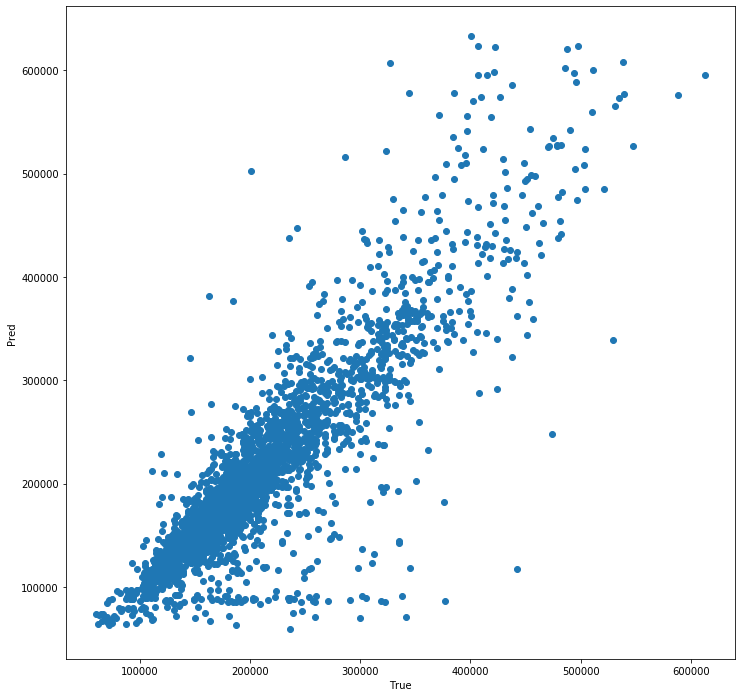

In [824]:
plt.figure(figsize=(12,12))
plt.scatter(y_pred, y_test['Price'])
plt.ylabel('Pred')
plt.xlabel('True')
plt.draw()

In [825]:
pd.DataFrame({'Id': X_test.index, 'Price': y_pred}).head(10)

,Id,Price
0,3898,322419.698078
1,1901,167880.777571
2,5690,174357.454833
3,11161,167112.021007
4,8268,112320.373695
5,7508,298613.461082
6,6397,163998.414142
7,9905,124113.087403
8,2581,329252.802326
9,16624,391041.369400
